In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rd

## Question 1: 

In class, we simulated two-dimensional (2D) and three-dimensional (3D) random walks, where the particle took a step of unit length, but was restricted to move only along the $\pm x$, $\pm y$, or $\pm z$ directions. For this problem, simulate a 2D random walk (in the $x-y$ plane) in which the particle must take a step of unit length, but it can be *in any direction*.
$\\$
$\\$
(a) Draw the path of one particle starting at $(x,y) = (0,0)$ taking $100$ steps.
$\\$
(b) Plot $\langle r^2 \rangle$, the average value of $r^2$, vs the number of steps up to $100$ steps, where $r$ is the distance from the origin. Average over the random walks of $500$ particles.

Walker 0
Walker 1
Walker 2
Walker 3
Walker 4
Walker 5
Walker 6
Walker 7
Walker 8
Walker 9
Walker 10
Walker 11
Walker 12
Walker 13
Walker 14
Walker 15
Walker 16
Walker 17
Walker 18
Walker 19
Walker 20
Walker 21
Walker 22
Walker 23
Walker 24
Walker 25
Walker 26
Walker 27
Walker 28
Walker 29
Walker 30
Walker 31
Walker 32
Walker 33
Walker 34
Walker 35
Walker 36
Walker 37
Walker 38
Walker 39
Walker 40
Walker 41
Walker 42
Walker 43
Walker 44
Walker 45
Walker 46
Walker 47
Walker 48
Walker 49
Walker 50
Walker 51
Walker 52
Walker 53
Walker 54
Walker 55
Walker 56
Walker 57
Walker 58
Walker 59
Walker 60
Walker 61
Walker 62
Walker 63
Walker 64
Walker 65
Walker 66
Walker 67
Walker 68
Walker 69
Walker 70
Walker 71
Walker 72
Walker 73
Walker 74
Walker 75
Walker 76
Walker 77
Walker 78
Walker 79
Walker 80
Walker 81
Walker 82
Walker 83
Walker 84
Walker 85
Walker 86
Walker 87
Walker 88
Walker 89
Walker 90
Walker 91
Walker 92
Walker 93
Walker 94
Walker 95
Walker 96
Walker 97
Walker 98
Walker 99
Walker 100

C:\Users\ngaco\AppData\Local\Temp\ipykernel_5540\3879815035.py:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Step Number')


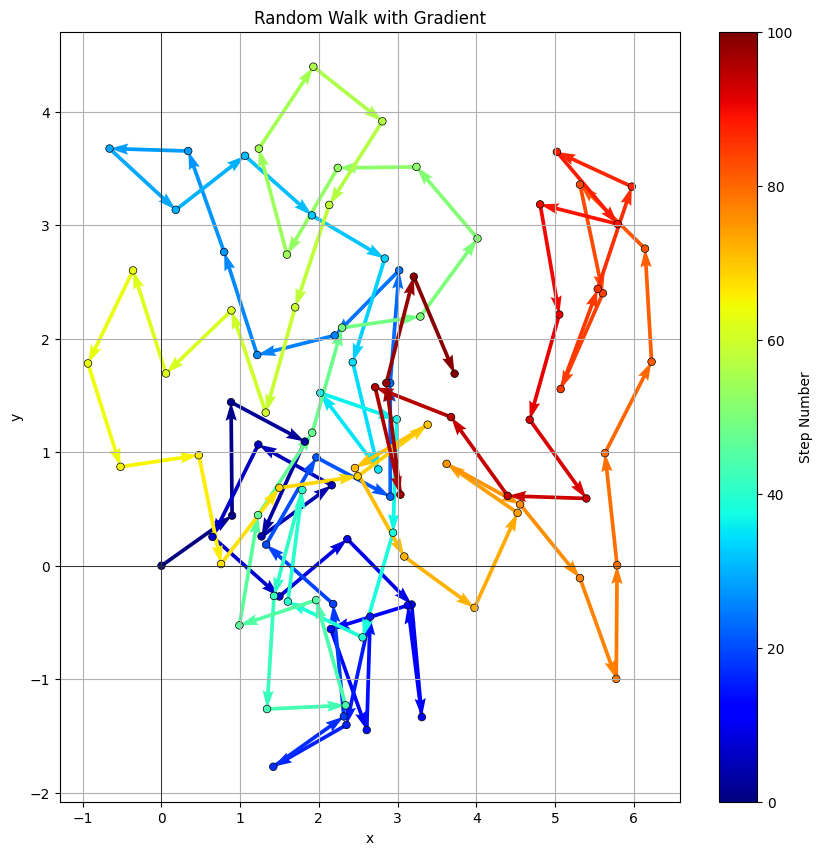

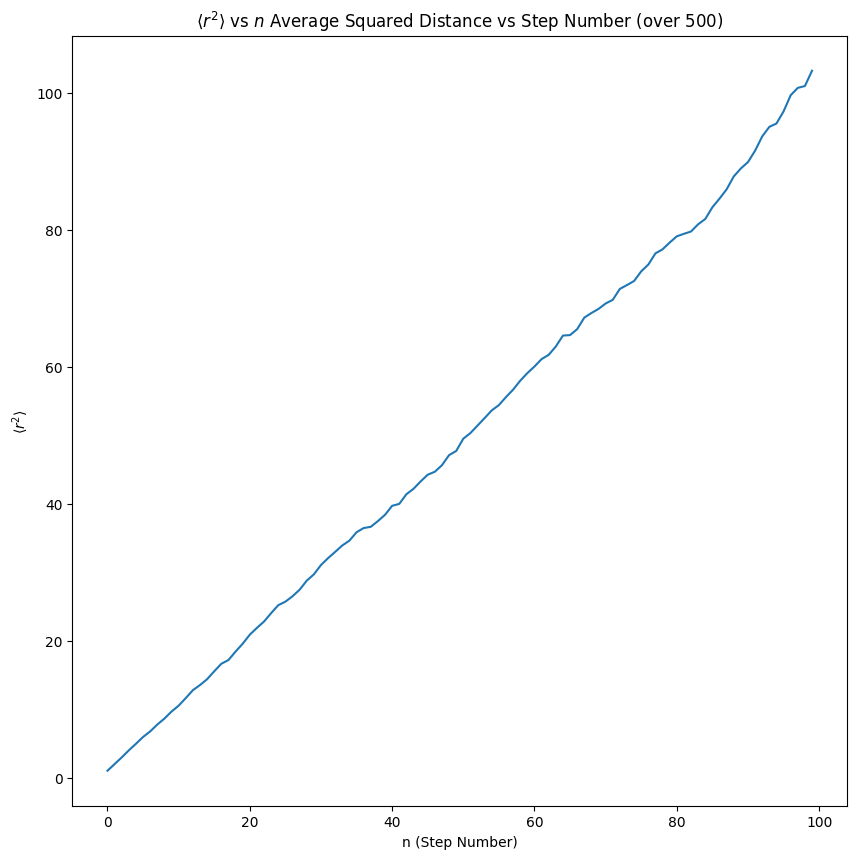

In [15]:
rd.seed(44)

PI = math.pi
nsteps = 100
nwalkers = 500

plt.figure(1, figsize=(10, 10))


Rav = np.zeros(nsteps)
Rav2 = np.zeros(nsteps)
xvals = [0]
yvals = [0]

for j in range(nwalkers):

    x, y, R = 0, 0, 0
    print(f'Walker {j}')

    for n in range(nsteps):
        theta = 2 * PI * rd.random()
        x += math.cos(theta)
        y += math.sin(theta)
        R = math.sqrt(x**2 + y**2) 
        Rav[n] += R/nwalkers
        Rav2[n] += R**2/nwalkers
        if j == 1:
            xvals.append(x)
            yvals.append(y)

# Compute the differences between consecutive x and y values
dx = np.diff(xvals)
dy = np.diff(yvals)

# Create a colormap and normalize based on the number of steps
cmap = plt.get_cmap('jet')
norm = plt.Normalize(0, nsteps)

# Use normalized sequence to map each step to a color
colors = [cmap(norm(value)) for value in range(nsteps)]


# Plot the quiver plot with gradient colors
plt.quiver(xvals[:-1], yvals[:-1], dx, dy, color=colors, angles='xy', scale_units='xy', scale=1)

# Plot the points with gradient colors
plt.scatter(xvals, yvals, color=colors + [cmap(norm(nsteps))], s=30, edgecolor='black', linewidth=0.5)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Random Walk with Gradient")

plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Add colorbar to show the gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Step Number')



plt.figure(2, figsize=(10, 10))
plt.title(r'$\langle r^2 \rangle$ vs $n$ Average Squared Distance vs Step Number (over 500)')
plt.xlabel('n (Step Number)')
plt.ylabel(r'$\langle r^2 \rangle$')
plt.plot(Rav2)

plt.show()

## Question 2:

Suppose a six-sided die (singular form of dice) is weighted such that the die has a higher probability to land on 2 than the other numbers. The true probability of the die to land on each side is: $\begin{align} &p(1)=0.15\\ &p(2)=0.25 \\ &p(3)=0.15 \\ &p(4)=0.15 \\ &p(5)=0.15 \\ &p(6)=0.15 \end{align}$

Write a simulation of an experiment which would measure the probability of the die to land on 2.$\\$
(a) For 5 separate trials, plot the measured probability vs the number of throws. Approaximately how many throws is necessary for the measured probability to converge to the true probability? (You can judge by eye.)$\\$
(b) For the number of throws found in part (a), run 1000 trials, and make a histogram of the measured probaility for each trial. What is the mean of this distrubution? What is the standard deviation?

Final measurement, trial # 0 :  0.26163081540770383
Final measurement, trial # 1 :  0.2696348174087044
Final measurement, trial # 2 :  0.24312156078039018
Final measurement, trial # 3 :  0.24912456228114058
Final measurement, trial # 4 :  0.2481240620310155


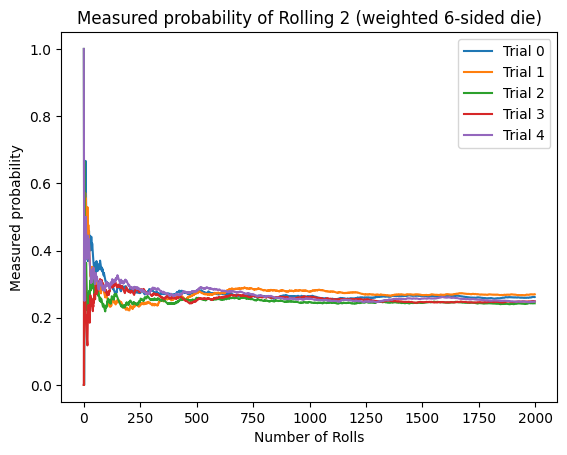

It seems at least 750 rolls is necessary for the measured probability to converge to the true probability.


In [41]:
rd.seed(44)

p_distinct = 0.25
ntrials=5
nrolls=2000

for i in range(ntrials):
    P2 = 0
    measured_P = []
    for j in range(1,nrolls):
        val=rd.random()
        if val<p_distinct:
            P2 += 1

        measured_P.append(P2/j)

    s="Trial "+str(i)
    plt.plot(measured_P,label=s)
    print("Final measurement, trial #",i,": ",P2/j)

plt.xlabel("Number of Rolls")
plt.ylabel("Measured probability")
plt.title("Measured probability of Rolling 2 (weighted 6-sided die)")
plt.legend()
plt.show()

print("It seems at least 750 rolls is necessary for the measured probability to converge to the true probability.")

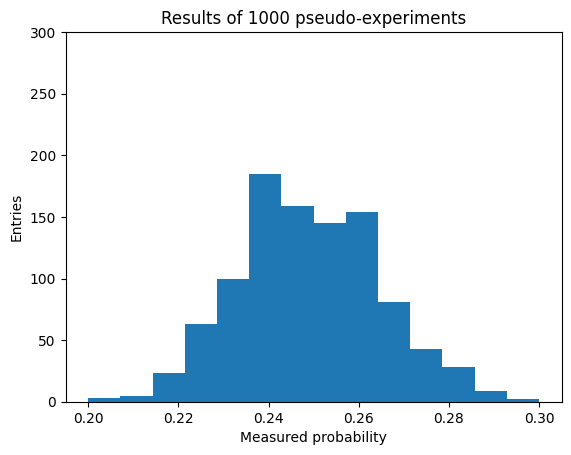

Mean of Distribution = 0.2490346666666665
Standard Deviation = 0.015612862161976864


In [42]:
rd.seed(44)

p=0.25
ntrials=1000
nrolls=750
measured_P=[]
for i in range(ntrials):
    P2=0
    for j in range(1,nrolls):
        val=rd.random()
        if(val<p):
            P2+=1
    measured_P.append(P2/nrolls)

b=np.linspace(0.20, 0.30, 15)
plt.hist(measured_P,bins=b)
plt.ylabel("Entries")
plt.xlabel("Measured probability")
plt.ylim(0,300)
plt.title("Results of 1000 pseudo-experiments")
plt.show()

print(f'Mean of Distribution = {sum(measured_P)/len(measured_P)}')
print(f'Standard Deviation = {np.std(measured_P)}')